#### A Discrete Population Estimation Model for  New Zealand Sheep Population

###### By Wadud Khan

**Discrete Modeling** is a technique used to model change in variables through recurrence relationships. We can explain discrete outcomes with some combination of discrete and/or continuous variables. A useful application of Discrete Modeling is in population estimation. For this project, we are given data on the birth and survival rates of female sheep, and their total population of different ages in 1965. We are provided with different age groups ranging from 0-11 years old divided into 1 year age groups.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("NewZealandSheepBirthandSurvivalRates.csv")
data

,Age (years),Birth Rate,Survival Rate,Population in 1965
0,0-1,0.000,0.891,105
1,1-2,0.045,0.975,156
2,2-3,0.391,0.965,175
3,3-4,0.435,0.850,227
4,4-5,0.484,0.926,186
5,5-6,0.546,0.895,153
6,6-7,0.543,0.850,134
7,7-8,0.502,0.786,126
8,8-9,0.486,0.691,94
9,9-10,0.495,0.561,67


Using this data, can we create a discrete model to estimate the **total** female sheep population 10 years later in 1975?

We see that each age group has respective birth and survival rates. This is crucial because it sets the stage for the recurrence relationships mentioned earlier. As time passes with a scale of 1 year, the population of an age group is determined by the population of the **previous age group that survived in the past year**. Aging sheep are grouped into a new age group every year.

* The survival rates give us information on the population for the next age group.
* The birth rates give us information on the population for the 0-1 year age group since all newborn sheep fall into this group.

<u>**Setting up the recurrence relationships**</u>

* $n$ = number of 1 year spans starting in 1965
* $P_n$ = Population of an age group at year 1965 + $n$

Since the 0-1 age group depends on every other age group it will be quite long:

$P_0 = 105$

$P_n = 0.045*(P_{n-1}$ of 1-2 age group) + $0.391*(P_{n-1}$ of 2-3 age group $)$ + $0.435*(P_{n-1}$ of 3-4 age group $)$ + $0.484*(P_{n-1}$ of 4-5 age group $)$ + $0.546*(P_{n-1}$ of 5-6 age group $)$ + $0.543*(P_{n-1}$ of 6-7 age group $)$ + $0.502*(P_{n-1}$ of 7-8 age group $)$ + $0.486*(P_{n-1}$ of 8-9 age group $)$ + $0.495*(P_{n-1}$ of 9-10 age group $)$ + $0.433*(P_{n-1}$ of 10-11 age group $)$ + $0.421*(P_{n-1}$ of 11 age group $)$

For all other age group, it is simply the age group below it, multiplied by its survival rate.

**For 1-2 age group:**

$P_0$ = 156

$P_n$ = $0.891*(P_{n-1}$ of 0-1 age group $)$

**For 2-3 age group:**

$P_0$ = 175

$P_n$ = $0.975*(P_{n-1}$ of 1-2 age group $)$

**For 3-4 age group:**

$P_0$ = 227

$P_n$ = $0.965*(P_{n-1}$ of 2-3 age group $)$

**For 4-5 age group:**

$P_0$ = 186

$P_n$ = $0.850*(P_{n-1}$ of 3-4 age group $)$

**For 5-6 age group:**

$P_0$ = 153

$P_n$ = $0.926*(P_{n-1}$ of 4-5 age group $)$

**And so on...**

This process is repeated for every age group.

In [3]:
import matplotlib.pyplot as plt

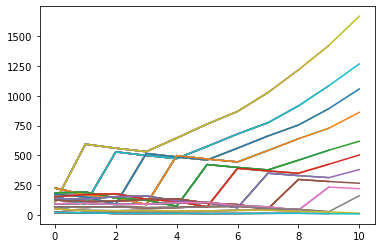

In [8]:
P1 = [105]
P2 = [156]
P3 = [175]
P4 = [227]
P5 = [186]
P6 = [153]
P7 = [134]
P8 = [126]
P9 = [94]
P10 = [67]
P11 = [52]
P11above = [22]

for i in range(10):
    P1_old = P1[-1]
    P2_old = P2[-1]
    P3_old = P3[-1]
    P4_old = P4[-1]
    P5_old = P5[-1]
    P6_old = P6[-1]
    P7_old = P7[-1]
    P8_old = P8[-1]
    P9_old = P9[-1]
    P10_old = P10[-1]
    P11_old = P11[-1]
    P11above_old = P11above[-1]
    P1_new = 0.045*(P2_old) +0.391*(P3_old) +0.435*(P4_old) +0.484*(P5_old) +0.546*(P6_old) +0.543*(P7_old) +0.502*(P8_old) +0.486*(P9_old) +0.495*(P10_old) +0.433*(P11_old) +0.421*(P11above_old)
    P2_new = 0.891*(P1_old)
    P3_new = 0.975*(P2_old)
    P4_new = 0.965*(P3_old)
    P5_new = 0.850*(P4_old)
    P6_new = 0.926*(P5_old)
    P7_new = 0.895*(P6_old)
    P8_new = 0.850*(P7_old)
    P9_new = 0.786*(P8_old)
    P10_new = 0.691*(P9_old)
    P11_new = 0.561*(P10_old)
    P11above_new = 0.370*(P11_old)
    P1.append(P1_new)
    P2.append(P2_new)
    P3.append(P3_new)
    P4.append(P4_new)
    P5.append(P5_new)
    P6.append(P6_new)
    P7.append(P7_new)
    P8.append(P8_new)
    P9.append(P9_new)
    P10.append(P10_new)
    P11.append(P11_new)
    P11above.append(P11above_new)
    plt.plot(range(len(P1)),P1,label="0-1")
    plt.plot(range(len(P2)),P2,label="1-2")
    plt.plot(range(len(P3)),P3,label="2-3")
    plt.plot(range(len(P4)),P4,label="3-4")
    plt.plot(range(len(P5)),P5,label="4-5")
    plt.plot(range(len(P6)),P6,label="5-6")
    plt.plot(range(len(P7)),P7,label="6-7")
    plt.plot(range(len(P8)),P8,label="7-8")
    plt.plot(range(len(P9)),P9,label="8-9")
    plt.plot(range(len(P10)),P10,label="9-10")
    plt.plot(range(len(P11)),P11,label="10-11")
    plt.plot(range(len(P11above)),P11above,label="11+")
    


A list was created for every age group and each proceeding entry is the new population of that age group after 1 year. With this in mind, we can sum the last entries on each list and this will give us the **estimated total population** 10 years later, in 1975. To check the validity of this, lets first sum up the _first_ values on each list to give us the total population in our starting year,1965. We expect a total population of 1497 as this information is explicitly given to us in the table.

In [5]:
P1[0] + P2[0] + P3[0] + P4[0] + P5[0] + P6[0] + P7[0] + P8[0] + P9[0] + P10[0] + P11[0] + P11above[0]

1497

Success! This approach works. Now lets sum up the last entries on each list to find our **estimated total population** in 1975:

In [6]:
P1[-1] + P2[-1] + P3[-1] + P4[-1] + P5[-1] + P6[-1] + P7[-1] + P8[-1] + P9[-1] + P10[-1] + P11[-1] + P11above[-1]

7030.995666024926

Finally, we estimate that the total population of New Zealand female sheep will be around 7,031 in 1975